**EDA - Exploratory Data Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  #OLS , statistical models

In [ ]:
df = pd.read_csv('/content/drive')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         183 non-null    float64
 1   radio      183 non-null    float64
 2   newspaper  183 non-null    float64
 3   sales      183 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,183.000000,183.000000,183.000000,183.000000
mean,148.178142,23.522951,30.472678,14.145355
std,86.327735,14.994450,21.821222,5.249267
min,0.700000,0.000000,0.300000,1.600000
25%,74.050000,9.750000,12.700000,10.450000
50%,149.700000,24.000000,25.900000,12.900000
75%,220.400000,36.550000,43.800000,17.800000
max,296.400000,49.600000,114.000000,27.000000


**Modeling**

In [ ]:
# !pip install sklearn       # ML library (models, split, metrics)
# !pip insall statsmodels     # stats library (OLS regression)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: unknown command "insall" - maybe you meant "install"


In [ ]:
#from sklearn.model_selection import train_test_split -> authomatic sklearn function
from sklearn.metrics import mean_squared_error    #error metric (MSE), misura quanto il modello sbaglia tra i valori reali e quelli previsti
#assuming df is my DataFrame
X = df[['TV', 'radio', 'newspaper']]  #Exogenous/Independent/predictors
y = df['sales']   #dependent variable or TARGET


In [ ]:
#manual split: 70% train, 30% test (keep row order)

train_size = int(len(df) * 0.7)   #len(df3) = tot righe ci sono nel dataset.
                                   ##* 0.7 = prende il 70% di quelle righe (per l’insieme di training).
                                   #int(...) = converte il risultato in numero intero (non decimale). Es: df 200 righe → train_size = 140.
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]   #X-y.iloc[:train_size] = prende le prime 140 righe → training set (insegnare al modello)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]  #X-y.iloc[train_size:] prende le restanti 60 righe → test set (ha imparato bene?)



In [ ]:
import statsmodels.api as sm
#sklearn

#add intercept (sia per train che per test per calcolare regressione)
#se uso Se usi statsmodels → devo scriverla io -> X = sm.add_constant(X)
#Altrimenti il modello non calcola il termine “a” (intercetta) e forza la linea a passare per l’origine (0,0), il che di solito è sbagliato.

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit() #crea un modello di regressione lineare (Ordinary Least Squares). tra variabili dip e ind + allenare

#show regression summary (coefficients, R², p-values)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1862.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):                   1.62e-103
Time:                        08:53:14   Log-Likelihood:                         -284.06
No. Observations:                 128   AIC:                                      574.1
Df Residuals:                     125   BIC:                                      582.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Mean Squared Error (MSE): 4.388 #with intercept
## Mean Squared Error (MSE): 4.765


Mean Squared Error (MSE): 4.765


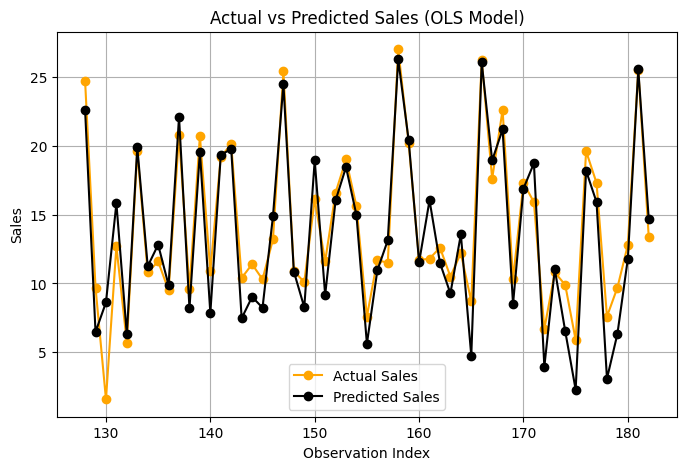

In [ ]:
# Predict on test data -> predire i valori di vendita (y_pred) sul test set
y_pred = model.predict(X_test) #X_test_const = le variabili indipendenti del test (con intercetta)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)      #misura l’errore medio quadratico tra valori reali e predetti
print(f"Mean Squared Error (MSE): {mse:.3f}")    #evaluate model performance (lower MSE = better)

# Combine for visualization -> crea nuovo dataframe per comparare:
comparison_df = pd.DataFrame({
    "Index": y_test.index,
    "Actual Sales": y_test,
    "Predicted Sales": y_pred
})

# ---- Line Graph ---- -> #plot real vs predicted sales (visual check of model fit)
plt.figure(figsize=(8, 5))   #create plot window (8x5 inches)
plt.plot(comparison_df["Index"], comparison_df["Actual Sales"], label="Actual Sales", color="orange", marker='o') #plot actual sales (orange line)
plt.plot(comparison_df["Index"], comparison_df["Predicted Sales"], label="Predicted Sales", color="black", marker='o') #plot predicted sales (black line)
plt.title("Actual vs Predicted Sales (OLS Model)")
plt.xlabel("Observation Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

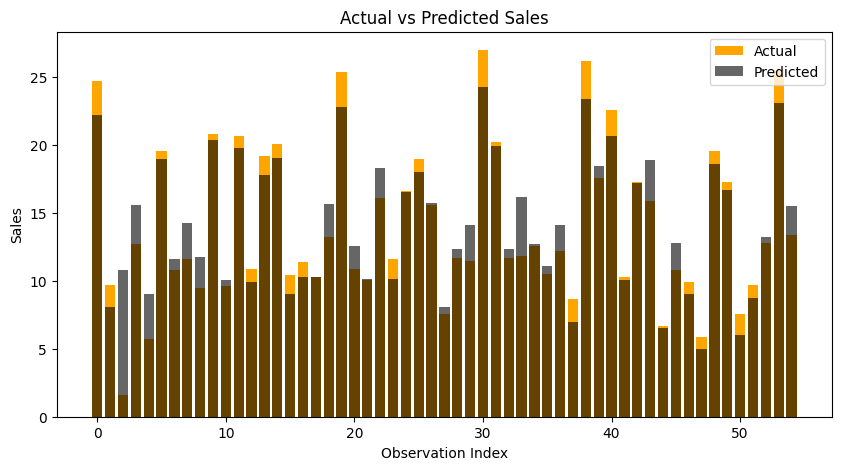

In [ ]:
plt.figure(figsize=(10,5))                                #graph size
index = range(len(y_test))                                #x positions

plt.bar(index, y_test, color='orange', label='Actual')     #bars for actual sales
plt.bar(index, y_pred, color='black', alpha=0.6, label='Predicted')  #bars for predicted

plt.title("Actual vs Predicted Sales")                     #title
plt.xlabel("Observation Index")                            #x label
plt.ylabel("Sales")                                        #y label
plt.legend()                                               #show legend
plt.show()

### Final Summary — Predictive Linear Regression

**Goal.** Build a **predictive model** of Sales from **TV, Radio, Newspaper** spending, then assess statistical validity and out-of-sample accuracy.

**Steps & Key Evidence**

1. **Prepare data.** Define **X** = [TV, Radio, Newspaper], **y** = Sales.
2. **Split 70/30.** Train on 70%, **test** on 30% to evaluate generalization.
3. **Fit OLS (with intercept).** Estimate coefficients via **Ordinary Least Squares**.
4. **Model fit.** **High (R^2)** indicates strong in-sample explanation; **low MSE** on test shows good predictive accuracy.
5. **Coefficients (interpretation).** **TV** and **Radio** show **positive, statistically significant** effects; **Newspaper** is **weak / not significant**.
6. **Validation plots.**

   * **Actual vs Predicted** lines close → good predictions.
   * **Residuals ≈ 0** without patterns → model assumptions reasonable.

**Conclusion.** The model is **predictively useful**: it generalizes well (low test **MSE**), explains a large share of variance (**high (R^2)**), and indicates that **TV** and **Radio** are the primary drivers of Sales, while **Newspaper** adds little predictive value.
